В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.
Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [22]:
# ! pip install xgboost

In [23]:
# ! pip install lightgbm

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

### Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [5]:
train = pd.read_csv(
    "assignment2_data/assignment_2_train.csv"
)
print("data.shape = {} rows, {} cols".format(*train.shape))
train.head(n=2)

data.shape = 9221 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 27.7+ MB


In [7]:
test_data = pd.read_csv(
    "assignment2_data/assignment_2_test.csv"
)
print("data.shape = {} rows, {} cols".format(*test_data.shape))
test_data.head(n=2)

data.shape = 8676 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.0,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.0,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_target = train["isFraud"]
train_data = train.drop(["isFraud"], axis=1)
print("data.shape = {} rows, {} cols".format(*train_data.shape))

data.shape = 9221 rows, 393 cols


In [9]:
train_data_numerical = train_data.select_dtypes(include=[np.number])

In [10]:
x_train, x_valid = train_test_split(
    train_data_numerical, train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 379 cols
x_valid.shape = 1845 rows, 379 cols


In [11]:
# XGBoost API
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [12]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [13]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

[12:52:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.61220	valid-auc:0.64676
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[9]	train-auc:0.64756	valid-auc:0.67064


In [14]:
# ! pip install pydot
# ! pip install pydotplus
# ! pip install graphviz

In [15]:
# fig, axes = plt.subplots(1, 1, figsize=(40, 40))
# xgb.plot_tree(model, num_trees=2, ax=axes)

In [16]:
# XGBoost Cross-Validation
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=25,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=3,
)

[12:52:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:52:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:52:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

In [17]:
def plot_evalute(cv_result):
    fig = plt.figure(figsize=(15, 5))
    plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
    plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")
    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
        y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
        alpha=0.25, color="blue"
    )
    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
        y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
        alpha=0.25, color="orange"
    )
    plt.title("XGBoost, CV-Results", size=14)
    plt.xlabel("n_iterations", size=14)
    plt.xlim(0, cv_result.index.max())
    plt.ylabel("ROC-AUC", size=14)
    plt.legend(loc="best")

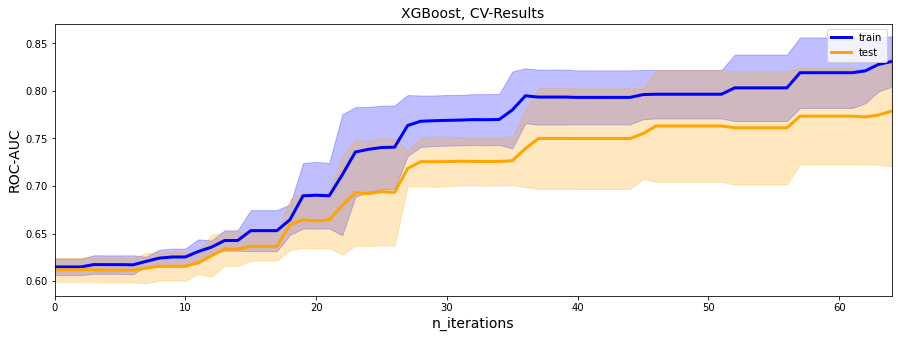

In [18]:
_ = plot_evalute(cv_result)

### Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [19]:
# Категориальные признаки
categorical_features = train.select_dtypes(include=[np.object])
print(f"Categorical Feature Count {categorical_features.shape[1]}")
categorical_features.head(n=2)

Categorical Feature Count 14


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN


In [24]:
# ! pip install missingno

In [25]:
# Анализ пропусков
import missingno as msno

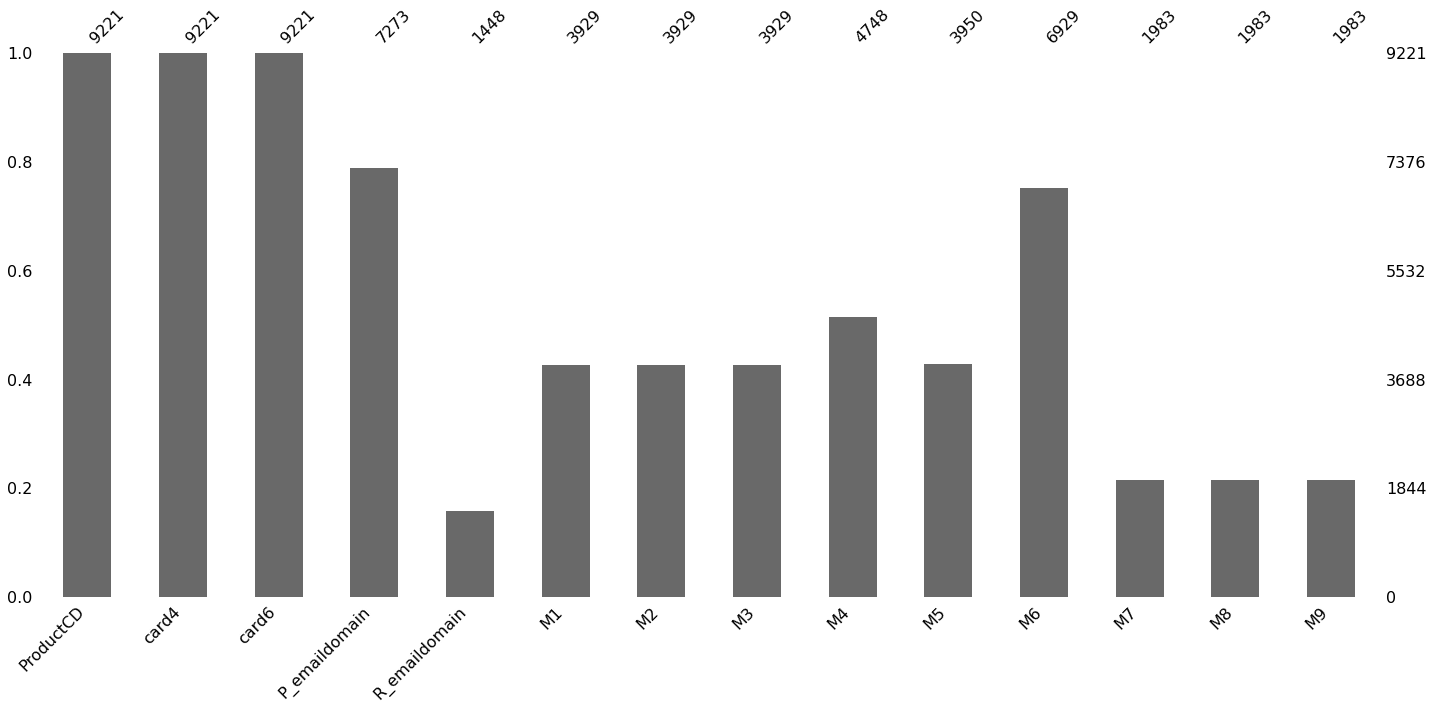

In [26]:
msno.bar(categorical_features, labels=True)

In [27]:
# Выберем те признаки, пропуски в которых менее 40%
categorical_features2 = [
    feature for feature in categorical_features.columns
    if (train[feature].isnull().sum() / train.shape[0]) < 0.6]

In [28]:
train_categorical = train.copy()
categorical_dummies = pd.get_dummies(train_categorical[categorical_features2])
train_categorical = train_categorical.join(categorical_dummies).drop(categorical_features.columns, axis=1)

In [29]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Columns: 452 entries, TransactionID to M6_T
dtypes: float64(376), int64(4), uint8(72)
memory usage: 27.4 MB


In [30]:
x_train, x_valid = train_test_split(
    train_categorical.drop('isFraud', axis=1), train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 451 cols
x_valid.shape = 1845 rows, 451 cols


[12:54:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.61220	valid-auc:0.64676
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[9]	train-auc:0.64756	valid-auc:0.67064
[12:54:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.

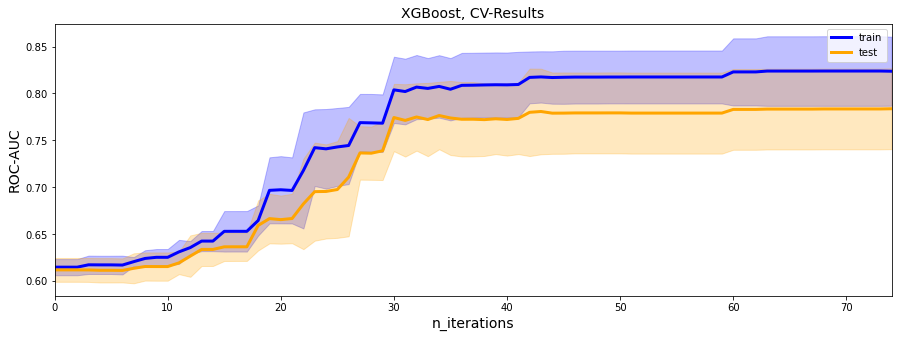

In [31]:
# XGBoost API
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

# XGBoost Cross-Validation
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=25,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=3,
)

_ = plot_evalute(cv_result)

Выводы: Катеогиальные признаки чуть улучшили метрику. Скорее всего неочень улучшения связаны с неоптимальным ОнеХотЭнкодинг. 

### Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [32]:
import lightgbm as lgb

In [33]:
x_train, x_valid = train_test_split(
    train_data_numerical, train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 379 cols
x_valid.shape = 1845 rows, 379 cols


In [34]:
# LightGBM API
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

In [35]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

D:\Users\biseruser\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 185, number of negative: 7191
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13229
[LightGBM] [Info] Number of data points in the train set: 7376, number of used features: 367
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025081 -> initscore=-3.660230
[LightGBM] [Info] Start training from score -3.660230
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.908572	valid_1's auc: 0.837131
[20]	training's auc: 0.908116	valid_1's auc: 0.848292
[30]	training's auc: 0.911427	valid_1's auc: 0.838936
[40]	training's auc: 0.944023	valid_1's auc: 0.837523
[50]	training's auc: 0.946814	valid_1's auc: 0.843705
[60]	training's auc: 0.950399	valid_1's auc: 0.867832
[70]	training's auc: 0.959713	valid_1's auc: 0.866042
[8

In [36]:
# LightGBM Cross-Validation
cv_result = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

D:\Users\biseruser\anaconda3\lib\site-packages\lightgbm\engine.py:530: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 148, number of negative: 5752
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13229
[LightGBM] [Info] Number of data points in the train set: 5900, number of used features: 367
[LightGBM] [Info] Number of positive: 148, number of negative: 5753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13229
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 367
[LightGBM] [Info] Number of positive: 148, number of negative: 5753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testi

### Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [37]:
x_train, x_valid = train_test_split(
    train_categorical.drop('isFraud', axis=1), train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 451 cols
x_valid.shape = 1845 rows, 451 cols


In [38]:
# LightGBM API
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 200,
    "n_jobs": 6,
    "seed": 27
}

dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10
)

[LightGBM] [Warning] 

D:\Users\biseruser\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 185, number of negative: 7191
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 7376, number of used features: 407
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025081 -> initscore=-3.660230
[LightGBM] [Info] Start training from score -3.660230
Training until validation scores don't improve for 50 rounds
[10]	training's auc: 0.907261	valid_1's auc: 0.837145
[20]	training's auc: 0.913104	valid_1's auc: 0.867881
[30]	training's auc: 0.918557	valid_1's auc: 0.869015
[40]	training's auc: 0.922404	valid_1's auc: 0.87085
[50]	training's auc: 0.938

In [39]:
# LightGBM Cross-Validation
cv_result = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=200,
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=10,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

[LightGBM] [Info] Number of positive: 148, number of negative: 5752
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 5900, number of used features: 407
[LightGBM] [Info] Number of positive: 148, number of negative: 5753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 407
[LightGBM] [Info] Number of positive: 148, number of negative: 5753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to re

D:\Users\biseruser\anaconda3\lib\site-packages\lightgbm\engine.py:530: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 407
[LightGBM] [Info] Number of positive: 148, number of negative: 5753
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 407
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025085 -> initscore=-3.660091
[LightGBM] [Info] Start training from score -3.660091
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025080 -> initscore=-3.660264
[LightGBM] [Info] Start t

### Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
le = OrdinalEncoder()

In [52]:
train_LGBM = train.copy()

In [75]:
train_LGBM[categorical_features.columns] = le.fit(train_LGBM[categorical_features.columns])

ValueError: Input contains NaN

In [62]:
# train_LGBM.loc[train_LGBM[categorical_features.columns].notna(), [categorical_features.columns]] = \
#         le.fit_transform(train_LGBM[categorical_features.columns].dropna().values.reshape(-1,1))
# train_LGBM[categorical_features.columns] = train_LGBM[categorical_features.columns].fillna(-1)

Не смог разобарться как подать в модель категориальные признаки (В описаниинаписано, что они должны быть закодированы целыми неотрицательными числами). Не смог побороть, как сделать такое кодирование при наличии пропусков в признаках, тк кодер ругаеться на их присутствие

Выводы: Добавление в обучение категориальных признаков (даже закодированных самым неоптимальным способом через ОнеХотЭнкодинг) добалвяет качества моедли

### Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [65]:
# ! pip install catboost

In [66]:
import warnings
import catboost as cb

In [67]:
x_train, x_valid = train_test_split(
    train_data_numerical, train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 379 cols
x_valid.shape = 1845 rows, 379 cols


In [68]:
# CatBoost Sklearn-API
cb_params = {
    "n_estimators": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 75,
    "thread_count": 6,
    "random_seed": 42
}

In [69]:
model = cb.CatBoostClassifier(**cb_params)
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)])

0:	test: 0.5898548	test1: 0.5611091	best: 0.5611091 (0)	total: 166ms	remaining: 33s
10:	test: 0.7318728	test1: 0.7426901	best: 0.7426901 (10)	total: 264ms	remaining: 4.54s
20:	test: 0.7736987	test1: 0.8005171	best: 0.8061296 (14)	total: 342ms	remaining: 2.92s
30:	test: 0.7663352	test1: 0.7880411	best: 0.8061296 (14)	total: 424ms	remaining: 2.31s
40:	test: 0.7803734	test1: 0.7918580	best: 0.8061296 (14)	total: 501ms	remaining: 1.94s
50:	test: 0.7904430	test1: 0.8026070	best: 0.8061296 (14)	total: 583ms	remaining: 1.7s
60:	test: 0.8029996	test1: 0.8206709	best: 0.8237421 (59)	total: 666ms	remaining: 1.52s
70:	test: 0.8108856	test1: 0.8226088	best: 0.8276031 (69)	total: 749ms	remaining: 1.36s
80:	test: 0.8167830	test1: 0.8293889	best: 0.8303112 (79)	total: 833ms	remaining: 1.22s
90:	test: 0.8211311	test1: 0.8351584	best: 0.8357961 (89)	total: 911ms	remaining: 1.09s
100:	test: 0.8221422	test1: 0.8378125	best: 0.8378125 (100)	total: 981ms	remaining: 962ms
110:	test: 0.8237196	test1: 0.84009

### Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [70]:
x_train, x_valid = train_test_split(
    train_categorical.drop('isFraud', axis=1), train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 451 cols
x_valid.shape = 1845 rows, 451 cols


In [71]:
# CatBoost Sklearn-API
cb_params = {
    "n_estimators": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 75,
    "thread_count": 6,
    "random_seed": 42
}

model = cb.CatBoostClassifier(**cb_params)
model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)])

0:	test: 0.5053043	test1: 0.5079870	best: 0.5079870 (0)	total: 20.5ms	remaining: 4.07s
10:	test: 0.7485724	test1: 0.7173555	best: 0.7173555 (10)	total: 101ms	remaining: 1.74s
20:	test: 0.7687519	test1: 0.7486705	best: 0.7486705 (20)	total: 189ms	remaining: 1.61s
30:	test: 0.7810769	test1: 0.7842733	best: 0.7859561 (29)	total: 279ms	remaining: 1.52s
40:	test: 0.7903615	test1: 0.8062767	best: 0.8066692 (39)	total: 361ms	remaining: 1.4s
50:	test: 0.8112645	test1: 0.8331567	best: 0.8353350 (49)	total: 455ms	remaining: 1.33s
60:	test: 0.8259232	test1: 0.8448919	best: 0.8448919 (60)	total: 538ms	remaining: 1.22s
70:	test: 0.8316071	test1: 0.8455444	best: 0.8455444 (70)	total: 616ms	remaining: 1.12s
80:	test: 0.8395878	test1: 0.8474675	best: 0.8479679 (78)	total: 701ms	remaining: 1.03s
90:	test: 0.8434954	test1: 0.8498617	best: 0.8499696 (89)	total: 784ms	remaining: 939ms
100:	test: 0.8444786	test1: 0.8529034	best: 0.8529034 (100)	total: 861ms	remaining: 844ms
110:	test: 0.8452510	test1: 0.85

### Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [72]:
train[categorical_features.columns] = train[categorical_features.columns].astype(str)

In [73]:
x_train, x_valid = train_test_split(
    train.drop('isFraud', axis=1), train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    train_target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 7376 rows, 393 cols
x_valid.shape = 1845 rows, 393 cols


In [74]:
# CatBoost Sklearn-API
cb_params = {
    "n_estimators": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 10,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 75,
    "thread_count": 6,
    "random_seed": 42
}

model = cb.CatBoostClassifier(**cb_params)
model.fit(
    X=x_train,
    y=y_train,
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    cat_features=categorical_features.columns,
)

0:	test: 0.5559509	test1: 0.5519546	best: 0.5519546 (0)	total: 45.4ms	remaining: 9.04s
10:	test: 0.6909485	test1: 0.7496370	best: 0.7496370 (10)	total: 466ms	remaining: 8.01s
20:	test: 0.7121304	test1: 0.7608766	best: 0.7609649 (19)	total: 899ms	remaining: 7.66s
30:	test: 0.7493936	test1: 0.7951646	best: 0.7953707 (28)	total: 1.3s	remaining: 7.08s
40:	test: 0.7762710	test1: 0.8037452	best: 0.8037452 (40)	total: 1.75s	remaining: 6.77s
50:	test: 0.7948618	test1: 0.8207494	best: 0.8207494 (50)	total: 2.16s	remaining: 6.3s
60:	test: 0.8182112	test1: 0.8286138	best: 0.8294576 (55)	total: 2.59s	remaining: 5.91s
70:	test: 0.8299022	test1: 0.8427578	best: 0.8427578 (70)	total: 3.01s	remaining: 5.47s
80:	test: 0.8387196	test1: 0.8528396	best: 0.8528396 (80)	total: 3.45s	remaining: 5.06s
90:	test: 0.8469382	test1: 0.8614055	best: 0.8614055 (90)	total: 3.85s	remaining: 4.61s
100:	test: 0.8467694	test1: 0.8631128	best: 0.8632305 (99)	total: 4.24s	remaining: 4.15s
110:	test: 0.8486163	test1: 0.8646

Выводы: Категориальные признаки добавляют качества модели. При явном указании Катбусту на эти категориальные признаки, качество еще лучше

###  Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

Не успел выполнить до конца